## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
print (pd.__version__)

2.1.4


# Read the datasets

In [4]:
train=pd.read_csv('../data/raw/training_data.csv')
train.shape

(1460, 81)

In [42]:
# import pandas as pd

# # Assuming 'df' is your DataFrame holding the dataset
# # You can replace 'df' with the name of your DataFrame

# # Get the data types of each column
# data_types = df.dtypes

# # Filter columns with numeric data types
# numeric_columns = data_types[data_types != 'object'].index.tolist()

# # Count the number of numeric columns
# num_numeric_features = len(numeric_columns)

# # Display the list of numeric columns and the count
# print("List of numeric columns:", numeric_columns)
# print("Number of numeric features:", num_numeric_features)


In [43]:
# import pandas as pd

# # Assuming 'df' is your DataFrame holding the dataset
# # You can replace 'df' with the name of your DataFrame

# # Get the data types of each column
# data_types = train.dtypes

# # Filter columns with non-numeric data types (typically categorical)
# categorical_columns = data_types[data_types == 'object'].index.tolist()

# # Count the number of categorical columns
# num_categorical_features = len(categorical_columns)

# # Display the list of categorical columns and the count
# print("List of categorical columns:", categorical_columns)
# print("Number of categorical features:", num_categorical_features)


# Check for outliers in data

In [5]:
# Function to detect outliers using IQR method and remove them from numeric columns
def remove_outliers_iqr(data):
    cleaned_data = data.copy()  # Create a copy of the original DataFrame
    numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()  # Numeric columns
    for col in numeric_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR
        # Remove outliers from the original DataFrame (only for numeric columns)
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    return cleaned_data

# Remove outliers from numeric columns only, retain all columns in the original DataFrame
cleaned_data = remove_outliers_iqr(train)



In [6]:
print("Train Shape: ",cleaned_data.shape)

Train Shape:  (560, 81)


train has 81 columns (79 features + id and target SalePrice) and 1460 entries
test has 80 columns (79 features + id) and 1459 entries

## CHECK FOR NULL VALUES

In [7]:
print(train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


<Axes: >

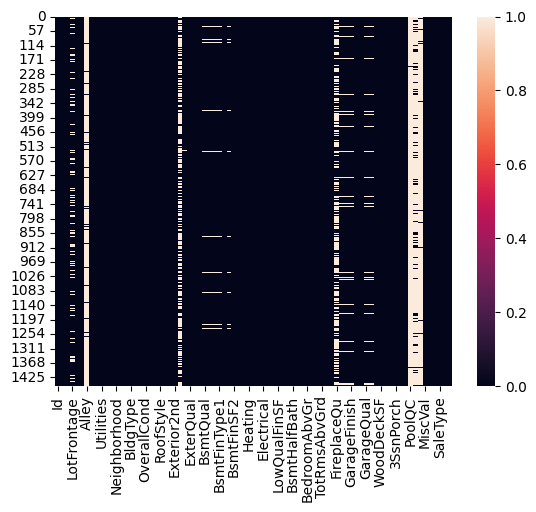

In [8]:
sns.heatmap(train.isnull())

Handling NULL data
We can see that ‘Alley’,’PoolQC’,’Fence’ and ‘MiscFeature’ columns have more than 70% of null values in both train and test data. So, we will drop these columns.
Also, we will drop ‘Id’ column. For non-categorical columns, we will handle null values by filling mean of the column.
For categorical columns, we will handle null values by filling mode of the column.

## Data Imputation

In [9]:
cat_col_train = ['FireplaceQu','GarageType','GarageFinish','MasVnrType','BsmtQual',
           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
          'GarageQual','GarageCond']

ncat_col_train = ['LotFrontage','GarageYrBlt','MasVnrArea']

for i in cat_col_train:
    train[i] = train[i].fillna(train[i].mode()[0])
    
for j in ncat_col_train:
    train[j] = train[j].fillna(train[j].mean())

## Drop Columns with more missing values

In [10]:
to_drop = ['Id','Alley','PoolQC','Fence','MiscFeature']

for k in to_drop:
    train.drop([k], axis = 1, inplace = True)

<Axes: >

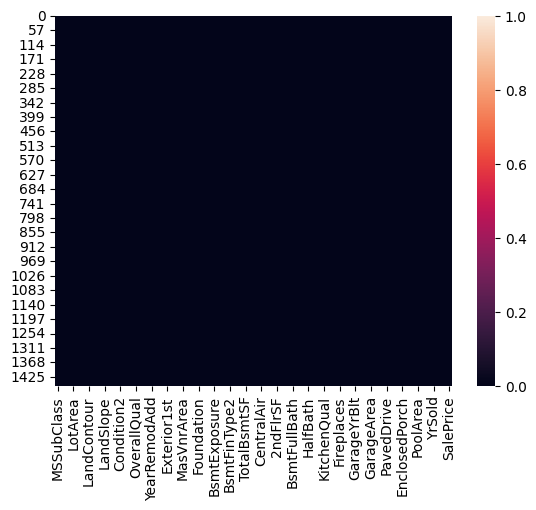

In [11]:
sns.heatmap(train.isnull())

It is observed that for some columns in train data few categories are not present but available in test data. So, we will concat test data to train data, then perform one hot encoding on all categorical columns.

In [12]:
train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [13]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

## Check p-values with Categorical features

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


/Users/carlsolli/Desktop/School/CS 4661 Data Science/house-price-prediction/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


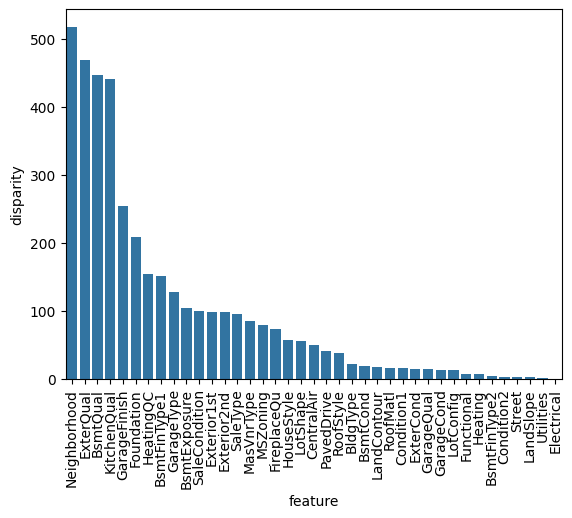

In [14]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

print(qualitative)


def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)
top_20_corr_categorical_features_Anova_features = list (a["feature"].head(25))
 

## Check Correltaion with Numeric Features

In [15]:
import numpy as np
print (np.__version__)

1.26.2


In [16]:
def correlated_features(train) :
    
    target_column = 'SalePrice'

    train = train.select_dtypes(include=['number'])

    # Compute the correlation matrix between features and the target variable
    correlation_with_target = train.corr()[target_column].abs().sort_values(ascending=False)
    # Set a threshold for selecting highly correlated features
    threshold = 0.1
    # Select features highly correlated with the target variable and get their names as a list
    corr_features = correlation_with_target[correlation_with_target >= threshold].drop(target_column).index.tolist()

    return corr_features


highly_correlated_features = correlated_features(train)


    

# Feature Selection

In [18]:
final_df = train [top_20_corr_categorical_features_Anova_features + highly_correlated_features + ['SalePrice']]

## One-Hot Encoding

In [19]:

final_df = pd.get_dummies(final_df)
# Example usage to read and display the data
final_df.head(3)


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,7,1710,2,548,856,856,2,8,2003,2003,...,False,False,False,False,False,True,False,False,False,True
1,6,1262,2,460,1262,1262,2,6,1976,1976,...,False,False,False,False,False,True,False,False,False,True
2,7,1786,2,608,920,920,2,6,2001,2002,...,False,False,False,False,False,True,False,False,False,True


In [20]:
final_df.dtypes

OverallQual        int64
GrLivArea          int64
GarageCars         int64
GarageArea         int64
TotalBsmtSF        int64
                   ...  
BsmtCond_TA         bool
LandContour_Bnk     bool
LandContour_HLS     bool
LandContour_Low     bool
LandContour_Lvl     bool
Length: 189, dtype: object

In [21]:
final_df.shape

(1460, 189)

In [22]:
final_df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,7,1710,2,548,856,856,2,8,2003,2003,...,False,False,False,False,False,True,False,False,False,True
1,6,1262,2,460,1262,1262,2,6,1976,1976,...,False,False,False,False,False,True,False,False,False,True
2,7,1786,2,608,920,920,2,6,2001,2002,...,False,False,False,False,False,True,False,False,False,True
3,7,1717,3,642,756,961,1,7,1915,1970,...,False,False,False,True,False,False,False,False,False,True
4,8,2198,3,836,1145,1145,2,9,2000,2000,...,False,False,False,False,False,True,False,False,False,True


## Saved the Prepocessed data

In [23]:
final_df.to_csv('../data/processed_data/feature_engineered_data.csv')